In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [10]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=42)

In [11]:
X.shape

(100, 2)

In [12]:
y.shape

(100,)

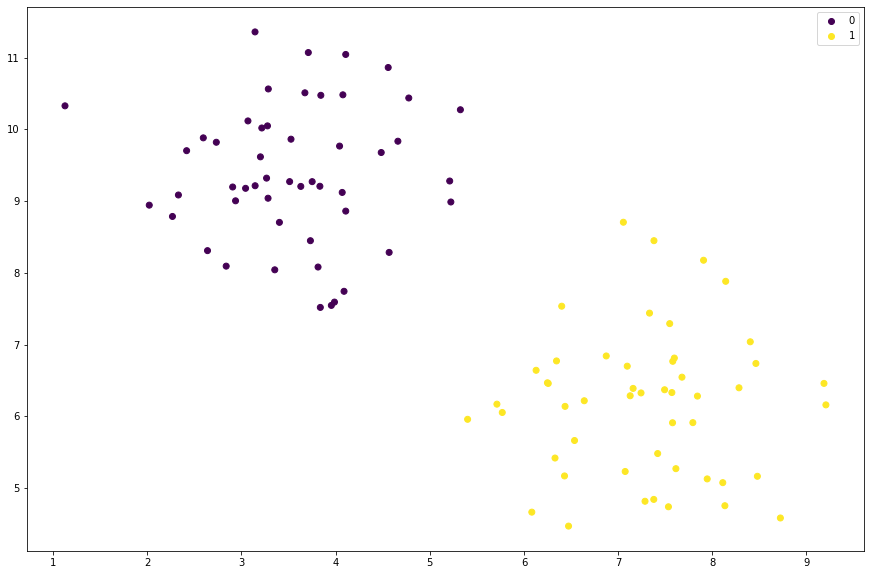

In [13]:
plt.figure(figsize=(15,10))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1]);

In [6]:
# Задача: классифицировать данные с помощью перцептрона

In [31]:
class Perceptron:
    
    def __init__(self):
        self.w = None
        self.lr = 0.001
        
    def activ_func(self,x):
        return np.where(x>0, 1, 0)
        

    def fit(self, x, y):
        # Сразу добавим bias к Х, чтобы не мучиться
        self.w = np.zeros(x.shape[1]+1)
        x = np.hstack((np.ones((x.shape[0], 1)), x))

        while True:
            misses = 0
            
            for i in range(len(x)):
                
                # Скалярное произведение матрицы весов и примера
                #out = None
                out = np.dot(x[i], self.w)
                y_pred = self.activ_func(out) # 1 or 0
                
                
                if y_pred != y[i]:
                # Корректировка весов, если пример предсказан неверно
                    self.w = self.w + self.lr *(y[i] - y_pred)*x[i]
                    update = self.lr *(y[i] - y_pred)
                    misses += int(update != 0)
                    

            if not misses:
                break
                
    def predict(self, x):
        out = np.dot(x, self.w)
        y_pred = self.activ_func(out)
        return y_pred
                
    

In [32]:
model = Perceptron()
model.fit(X, y)

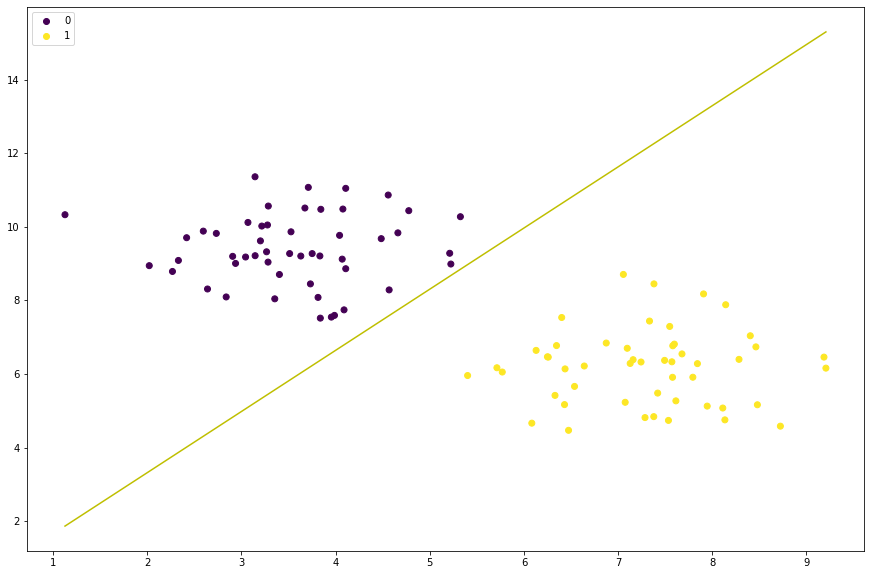

In [34]:
# Выводим результат работы перцептрона, должно получиться, как внизу

plt.figure(figsize=(15,10))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1]);

x1 = np.array([min(X[:, 0]), max(X[:, 0])])
k = -model.w[1]/model.w[2]
b = -model.w[0]/model.w[2]

x2 = k*x1 + b

plt.plot(x1, x2, 'y-')